# Challenge 1: Netflix Data Analysis

##### Team: Clément FORNAGE - Clément EDOUARD - Quentin DENIS - Pierre-Antoine HIGNARD NAUDEAU - Marin HEROGUER - Romain ACHARD

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### 2. Import Data

In [62]:
path = "../data/"
movies = pd.read_csv(path + "netflix_titles.csv")

### 3. First Data Exploration

We display the first few rows to understand the data structure

In [63]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


We print the shape of the dataset

In [64]:
movies.shape

(8807, 12)

We display basic information about the dataset

In [65]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### 4. Features Selection

We first delete the variables that seem to be irrelevant for our analysis.

Variable "show_id" is irrelevant because we already have an id for each row and variable "date_added" is not interesting in our study of the dataset.

In [66]:
movies_cleaned = movies.drop(["show_id", "date_added"], axis = 1)
movies_cleaned

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### 5. Missing Data Analysis

We print the missing values per column to see how many we miss

In [67]:
movies_cleaned.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [68]:
#With percentages
movies_cleaned.isnull().mean() * 100

type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

Text(0.5, 1.0, 'Netflix Dataset Missing Values Matrix per Variable')

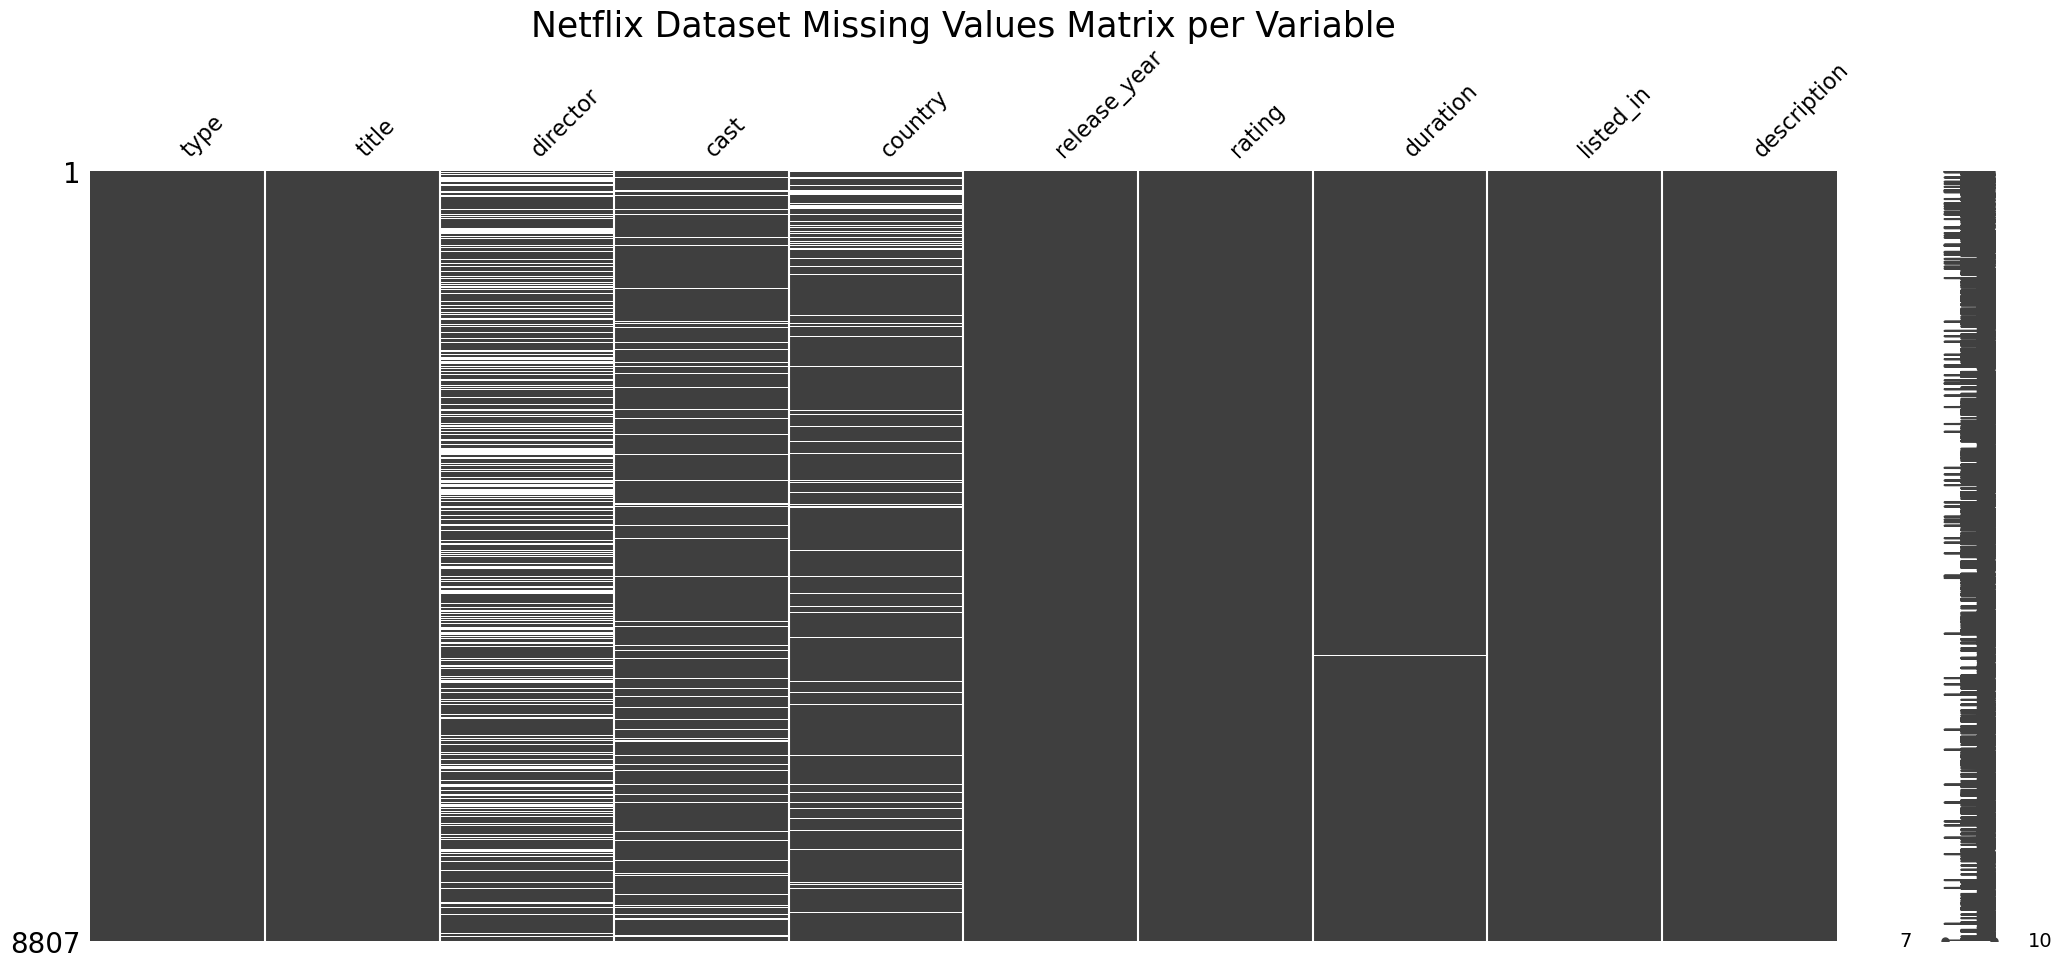

In [69]:
msno.matrix(movies_cleaned)
plt.title("Netflix Dataset Missing Values Matrix per Variable", fontsize = 25)

We now treat the missing values with different methods depending on the variable:

We first check the few missing values of the variables "rating" and "duration" in order to see more in detail what is happening

In [71]:
movies_cleaned[movies_cleaned["rating"].isnull()]

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
5989,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [72]:
movies_cleaned[movies_cleaned["duration"].isnull()]

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


We can see "rating" and "duration" were switched for some values so we can try to switch them again

Let's see if they are the only switched values

In [76]:
movies_cleaned["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

They are indeed the only ones. We can now switch the values. 

In [ ]:
movies_cleaned.iloc[5541, "duration"] = movies_cleaned.iloc[5541, "rating"]
movies_cleaned.iloc[5794, "duration"] = movies_cleaned.iloc[5794, "rating"]
movies_cleaned.iloc[5813, "duration"] = movies_cleaned.iloc[5813, "rating"]

For "rating" and "duration" variables, we just delete the few rows with missing values as we just have few NA values in each of these variables

In [49]:
movies_cleaned = movies_cleaned.dropna(subset = ["rating", "duration"])

For "director", "cast" and "country" variables, we can replace NA values by "No director", "No cast" and "No country" values

In [50]:
movies_cleaned.loc[:, "director"] = movies_cleaned["director"].fillna("No director")
movies_cleaned.loc[:, "cast"] = movies_cleaned["cast"].fillna("No cast")
movies_cleaned.loc[:, "country"] = movies_cleaned["country"].fillna("No country")

We now check we don't have any missing values anymore

In [51]:
movies_cleaned.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

We can also check the new shape of the dataset

In [52]:
movies_cleaned.shape

(8800, 10)

### 6. Look to remove duplicates

We check our dataset to identify possible duplicates

In [53]:
movies_cleaned.duplicated().sum()

0

We got 0 duplicates in our dataset

### 7. Dataset Transformation

We first look at the "duration" variable to see its format and its different values

In [54]:
print(movies_cleaned['duration'].unique())

['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'
 '189 min' '141 min' '130 min' '138 min' '81 min' '132 min' '10 Seasons'
 '123 min' '65 min' '68 min' '66 min' '62 min' '74 min' '131 min' '39 min'
 '46 m

We can then split the variable in 2 variables: "duration_value" and "duration_unit"

In [55]:
movies_cleaned[["duration_value", "duration_unit"]] = movies_cleaned["duration"].str.split(" ", expand = True)
movies_cleaned.loc[movies_cleaned["duration_unit"] == "Season", "duration_unit"] = "Seasons"
movies_cleaned

/var/folders/mq/9w31n29d4kq7p98h20gsn8h00000gn/T/ipykernel_69444/844823077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned[["duration_value", "duration_unit"]] = movies_cleaned["duration"].str.split(" ", expand = True)
/var/folders/mq/9w31n29d4kq7p98h20gsn8h00000gn/T/ipykernel_69444/844823077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned[["duration_value", "duration_unit"]] = movies_cleaned["duration"].str.split(" ", expand = True)


,type,title,director,cast,country,release_year,rating,duration,listed_in,description,duration_value,duration_unit
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,TV Show,Blood & Water,No director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No country,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Seasons
3,TV Show,Jailbirds New Orleans,No director,No cast,No country,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Seasons
4,TV Show,Kota Factory,No director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,min
8803,TV Show,Zombie Dumb,No director,No cast,No country,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2,Seasons
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,min
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,min


We check we have the right number of values in each new variable created

In [113]:
movies_cleaned[["duration_value", "duration_unit"]].count()

duration_value    8800
duration_unit     8800
dtype: int64

We now want to simplify the "rating" variable in order to create clearer categories and facilitate the next steps of the analysis

First, we examine the "rating" variable to understand its format and the different values it contains

In [110]:
print(movies_cleaned['rating'].unique())

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


We can now create the clearer categories: "Kids", "Teens" and "Adults" and simplify the "rating" variable

In [112]:
rating_categories = {'TV-Y': 'Kids', 'TV-G': 'Kids', 'TV-Y7': 'Kids', 'TV-Y7-FV': 'Kids', 'G': 'Kids',
                    'PG': 'Teens', 'TV-PG': 'Teens', 'PG-13': 'Teens', 'TV-14': 'Teens',
                    'R': 'Adults', 'TV-MA': 'Adults', 'NC-17': 'Adults', 'NR': 'Adults', 'UR': 'Adults'
                    }

movies_cleaned['rating_category'] = movies['rating'].map(rating_categories)
movies_cleaned

/var/folders/mq/9w31n29d4kq7p98h20gsn8h00000gn/T/ipykernel_36062/2403207580.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_cleaned['rating_category'] = movies['rating'].map(rating_categories)


,type,title,director,cast,country,release_year,rating,duration,listed_in,description,duration_value,duration_unit,rating_category
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min,Teens
1,TV Show,Blood & Water,No director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons,Adults
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No country,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season,Adults
3,TV Show,Jailbirds New Orleans,No director,No cast,No country,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season,Adults
4,TV Show,Kota Factory,No director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,min,Adults
8803,TV Show,Zombie Dumb,No director,No cast,No country,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2,Seasons,Kids
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,min,Adults
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,min,Teens


We check we have the right number of values in the new variable "rating_category" created

In [114]:
movies_cleaned[["rating_category"]].count()

rating_category    8800
dtype: int64

### 8. Some Data Visualizations

In [116]:
print(movies_cleaned["director"].value_counts())

director
No director                2631
Rajiv Chilaka                19
Raúl Campos, Jan Suter       18
Suhas Kadav                  16
Marcus Raboy                 16
                           ... 
Mu Chu                        1
Chandra Prakash Dwivedi       1
Majid Al Ansari               1
Peter Hewitt                  1
Mel Stuart                    1
Name: count, Length: 4527, dtype: int64


In [25]:
grouped = movies_cleaned.groupby("country", as_index = False).count()
orted_grouped = grouped.sort_values(by='title', ascending=False)
orted_grouped

,country,type,title,director,cast,release_year,rating,duration,listed_in,description
604,United States,2815,2815,2815,2815,2815,2815,2815,2815,2815
251,India,972,972,972,972,972,972,972,972,972
370,No country,830,830,830,830,830,830,830,830,830
507,United Kingdom,419,419,419,419,419,419,419,419,419
319,Japan,244,244,244,244,244,244,244,244,244
...,...,...,...,...,...,...,...,...,...,...
744,Venezuela,1,1,1,1,1,1,1,1,1
745,"Venezuela, Colombia",1,1,1,1,1,1,1,1,1
1,", South Korea",1,1,1,1,1,1,1,1,1
747,West Germany,1,1,1,1,1,1,1,1,1


In [26]:
movies_cleaned.groupby("type", as_index = False).count()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
0,Movie,6126,6126,6126,6126,6126,6126,6126,6126,6126
1,TV Show,2674,2674,2674,2674,2674,2674,2674,2674,2674


In [55]:
movies_cleaned['release_year'].sort_values(ascending = False).unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978,
       1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967,
       1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1956, 1955,
       1954, 1947, 1946, 1945, 1944, 1943, 1942, 1925])